#### Nombre: **07_optimizacion_modelos_gpu_colab**
#### Autores: _Sergio Cañón  Laiz y Ignacio Ruiz de Zuazu Echavarría_
#### CUNEF
#### 15/01/2021


Uno de los mayores requisitos para hacer un modelo de CNN es la de la capacidad computacional
Aquí se hizo uso del GPU de Google para lanzar bucles de optimización del hiperparámetro "learning rate".
Sin embargo, ninguno fue capaz de superar al modelo base,.

# Librerías

In [1]:
# importamos librerías 

import numpy as np  # álgebra lineal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import glob  # pathnames
import cv2  # lectura y procesamiento de las imagenes

import matplotlib.pyplot as plt  # gráficos
import matplotlib.image as mpimg

import os  # lectura de directorios

import keras 
from keras.layers import *
from keras.models import *
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras import optimizers
import time #tiempos de ejecución
from random import shuffle
from keras.preprocessing import image
import imageio


from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import json

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import math


# Importación de datos

In [2]:
# union con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

In [6]:
categorical_labels_race = np.load('categorical_labels_race.npy')
categorical_labels_gender = np.load('categorical_labels_gender.npy')
categorical_labels_age = np.load('categorical_labels_age.npy')

In [8]:
X = np.load('data_32_32_rgb.npy')

In [9]:
size = len(X)
print("La longuitud del los datos son de:", size)

La longuitud del los datos son de: 24099


Usaremos un 30% de las iamgenes como test y el 70% como train.


In [ ]:
#creacion train y test set

(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels_race[:15008]) , (X[15008:] , categorical_labels_race[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [ ]:
print("Número de imagenes en el train:",x_train.shape[0])
print("Número de imagenes en el test:",x_test.shape[0])

Número de imagenes en el train: 15008
Número de imagenes en el test: 2091


# Model Building

#   RAZA

In [ ]:
learning_rate = [0.01,0.005,0.001,0.0005,0.0001]
scores_race = []
history_race = []

for i in learning_rate:
    model_race = tf.keras.Sequential()
    # Primera capa de la CNN. El imput debe ajsutarse al tamañ ode la imagen (32 x 32 y 3 de los colores)
    model_race.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model_race.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_race.add(tf.keras.layers.Dropout(0.3))
    
    model_race.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
    model_race.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_race.add(tf.keras.layers.Dropout(0.3))

    model_race.add(tf.keras.layers.Flatten())
    model_race.add(tf.keras.layers.Dense(256, activation='relu'))
    model_race.add(tf.keras.layers.Dropout(0.5))
    model_race.add(tf.keras.layers.Dense(5, activation='softmax'))

  # Take a look at the model summary
   model_race.summary()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

 

    model_race.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=i),
              metrics=['accuracy','AUC','categorical_accuracy'])

    h_model_race = model_race.fit(x_train,
          y_train,
          batch_size=100,
          epochs=200, callbacks=[es],
          validation_data=(x_valid, y_valid))
    scores_race.append(model_race.evaluate(x_test, y_test, verbose=0)) 
    history_race.append(h_model_race.history)


Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 32, 32, 128)       1664      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_145 (Dropout)        (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 16, 16, 128)       65664     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_146 (Dropout)        (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 8192)            

In [ ]:
  mc = ModelCheckpoint('model_race_optimizado.h', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


MODELO 0

 val_loss: 1.255358338356018

 val_accuracy: 52.08  %

 val_AUC: 79.18  %

 val_categorical_accuracy: 52.08  %


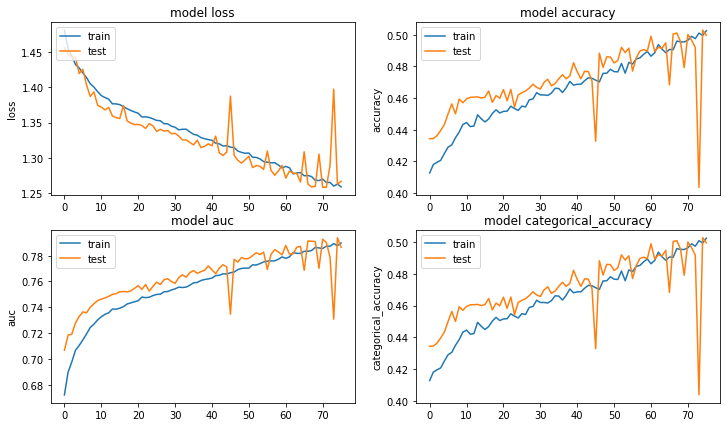

MODELO 1

 val_loss: 1.3602972030639648

 val_accuracy: 47.63  %

 val_AUC: 75.45  %

 val_categorical_accuracy: 47.63  %


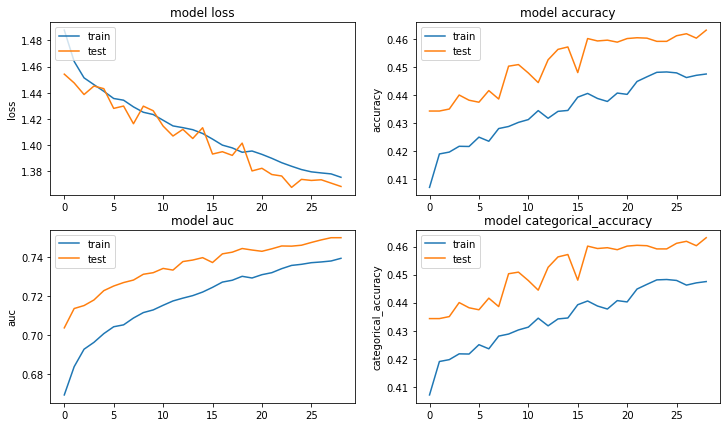

MODELO 2

 val_loss: 1.3567653894424438

 val_accuracy: 47.15  %

 val_AUC: 75.45  %

 val_categorical_accuracy: 47.15  %


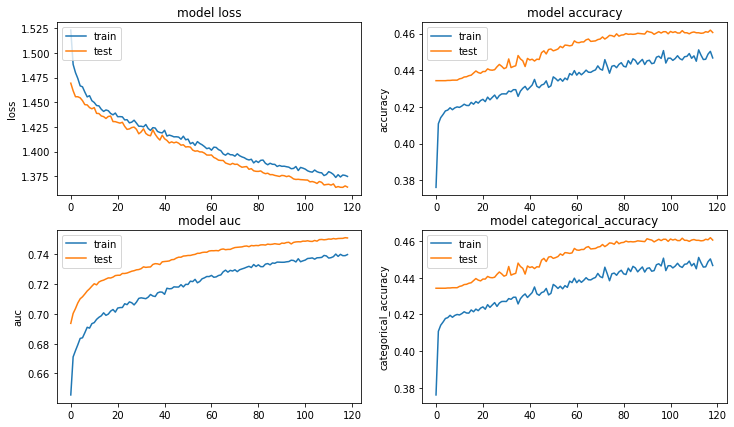

MODELO 3

 val_loss: 1.3650474548339844

 val_accuracy: 46.53  %

 val_AUC: 75.2  %

 val_categorical_accuracy: 46.53  %


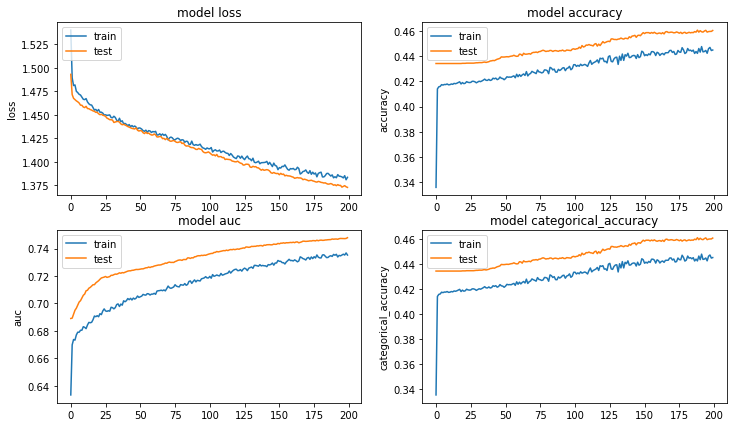

MODELO 4

 val_loss: 1.4281619787216187

 val_accuracy: 43.38  %

 val_AUC: 72.52  %

 val_categorical_accuracy: 43.38  %


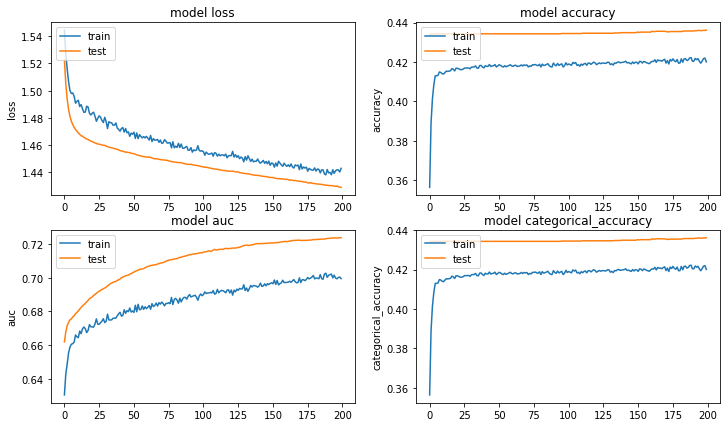

In [ ]:
lista = [0,1,2,3,4]

for i in lista:
    print(f"MODELO {i}")
    # Print test accuracy
    print('\n', 'val_loss:', scores_race[i][0])
    print('\n', 'val_accuracy:', round(scores_race[i][1]*100,2)," %")
    print('\n', 'val_AUC:', round(scores_race[i][2]*100,2)," %")
    print('\n', 'val_categorical_accuracy:', round(scores_race[i][3]*100,2)," %")

    fig = plt.figure(figsize=(12,7))

    ax1 = fig.add_subplot(221)
    ax1.plot(history_race[i]['loss'])
    ax1.plot(history_race[i]['val_loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.legend(['train', 'test'], loc='upper left')


    ax2 = fig.add_subplot(222)
    ax2.plot(history_race[i]['accuracy'])
    ax2.plot(history_race[i]['val_accuracy'])
    ax2.set_title('model accuracy')
    ax2.set_ylabel('accuracy')
    ax2.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(223)
    ax3.plot(history_race[i]['auc'])
    ax3.plot(history_race[i]['val_auc'])
    ax3.set_title('model auc')
    ax3.set_ylabel('auc')
    ax3.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(224)
    ax3.plot(history_race[i]['categorical_accuracy'])
    ax3.plot(history_race[i]['val_categorical_accuracy'])
    ax3.set_title('model categorical_accuracy')
    ax3.set_ylabel('categorical_accuracy')
    ax3.legend(['train', 'test'], loc='upper left')


    plt.show()

# GENERO

In [ ]:
#creacion train y test set

(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels_gender[:15008]) , (X[15008:] , categorical_labels_gender[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [ ]:
learning_rate = [0.005,0.001,0.0005]
scores_gender = []
history_gender = []

for i in learning_rate:
    model_gender = tf.keras.Sequential()

    # Primera capa de la CNN. El imput debe ajsutarse al tamañ ode la imagen (32 x 32 y 3 de los colores)
    model_gender.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model_gender.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_gender.add(tf.keras.layers.Dropout(0.3))

    model_gender.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
    model_gender.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_gender.add(tf.keras.layers.Dropout(0.3))

    model_gender.add(tf.keras.layers.Flatten())
    model_gender.add(tf.keras.layers.Dense(256, activation='relu'))
    model_gender.add(tf.keras.layers.Dropout(0.5))

    model_gender.add(tf.keras.layers.Dense(2, activation='softmax'))

    # Take a look at the model summary
    model_gender.summary()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)



    model_gender.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=i),
              metrics=['accuracy','AUC','categorical_accuracy'])

    h_model_gender = model_gender.fit(x_train,
          y_train,
          batch_size=100,
          epochs=200, callbacks=[es],
          validation_data=(x_valid, y_valid))

    scores_gender.append(model_gender.evaluate(x_test, y_test, verbose=0)) 
    history_gender.append(h_model_gender.history)

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 32, 32, 128)       1664      
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_160 (Dropout)        (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 128)       65664     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_161 (Dropout)        (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_65 (Flatten)         (None, 8192)            

MODELO 0

 val_loss: 0.5752248764038086

 val_accuracy: 69.34  %

 val_AUC: 76.93  %

 val_categorical_accuracy: 69.34  %


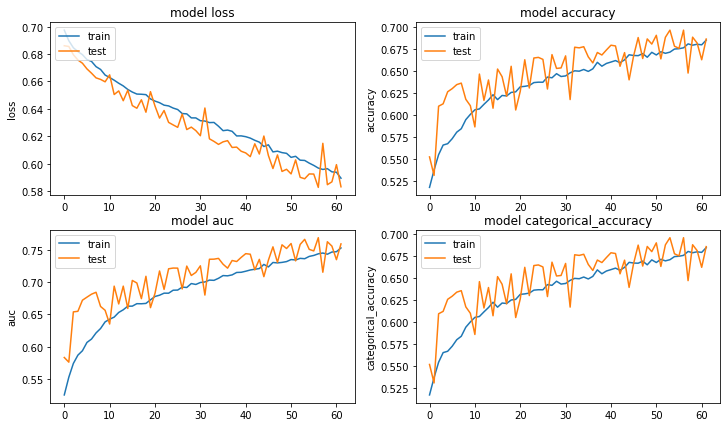

MODELO 1

 val_loss: 0.6285944581031799

 val_accuracy: 64.47  %

 val_AUC: 70.63  %

 val_categorical_accuracy: 64.47  %


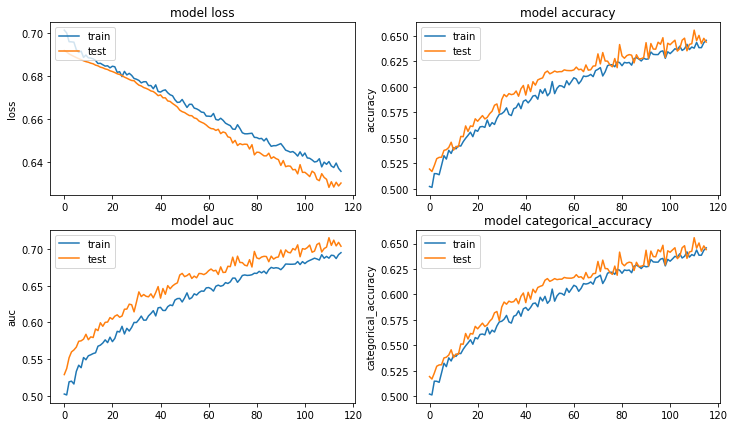

MODELO 2

 val_loss: 0.6449339389801025

 val_accuracy: 61.98  %

 val_AUC: 67.87  %

 val_categorical_accuracy: 61.98  %


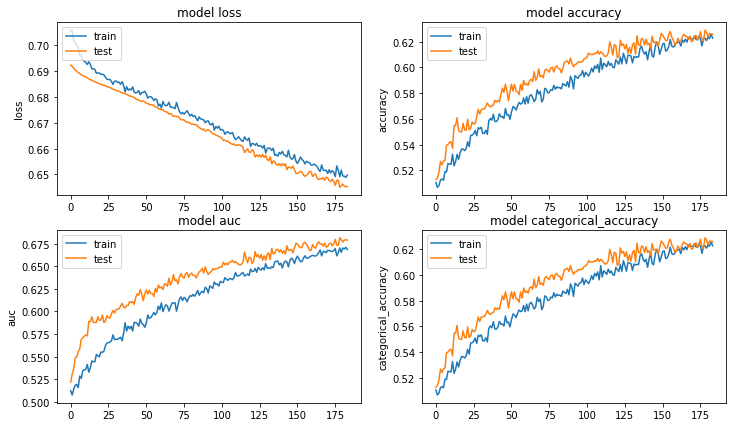

In [ ]:
lista = [0,1,2]

for i in lista:
    print(f"MODELO {i}")
    # Print test accuracy
    print('\n', 'val_loss:', scores_gender[i][0])
    print('\n', 'val_accuracy:', round(scores_gender[i][1]*100,2)," %")
    print('\n', 'val_AUC:', round(scores_gender[i][2]*100,2)," %")
    print('\n', 'val_categorical_accuracy:', round(scores_gender[i][3]*100,2)," %")

    fig = plt.figure(figsize=(12,7))

    ax1 = fig.add_subplot(221)
    ax1.plot(history_gender[i]['loss'])
    ax1.plot(history_gender[i]['val_loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.legend(['train', 'test'], loc='upper left')


    ax2 = fig.add_subplot(222)
    ax2.plot(history_gender[i]['accuracy'])
    ax2.plot(history_gender[i]['val_accuracy'])
    ax2.set_title('model accuracy')
    ax2.set_ylabel('accuracy')
    ax2.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(223)
    ax3.plot(history_gender[i]['auc'])
    ax3.plot(history_gender[i]['val_auc'])
    ax3.set_title('model auc')
    ax3.set_ylabel('auc')
    ax3.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(224)
    ax3.plot(history_gender[i]['categorical_accuracy'])
    ax3.plot(history_gender[i]['val_categorical_accuracy'])
    ax3.set_title('model categorical_accuracy')
    ax3.set_ylabel('categorical_accuracy')
    ax3.legend(['train', 'test'], loc='upper left')


    plt.show()

# EDAD

In [10]:
#creacion train y test set

(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels_age[:15008]) , (X[15008:] , categorical_labels_age[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [14]:
learning_rate = [0.15,0.001,0.0095]
scores_age = []
history_age = []

for i in learning_rate:
    model_adam_age = tf.keras.Sequential()

    # Primera capa de la CNN. El imput debe ajsutarse al tamañ ode la imagen (32 x 32 y 3 de los colores)

    # aumentamos los filters a 256 y el kernel l obajamos a 2 debido a que la edad es más dificil de predecir

    model_adam_age.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model_adam_age.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_adam_age.add(tf.keras.layers.Dropout(0.3))
    model_adam_age.add(tf.keras.layers.Dense(128, activation='relu'))

    model_adam_age.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu')) 
    model_adam_age.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model_adam_age.add(tf.keras.layers.Dropout(0.3))

    model_adam_age.add(tf.keras.layers.Flatten())
    model_adam_age.add(tf.keras.layers.Dense(128, activation='relu'))
    model_adam_age.add(tf.keras.layers.Dropout(0.5))

    model_adam_age.add(tf.keras.layers.Dense(5, activation='softmax'))

    # Take a look at the model summary
    model_adam_age.summary()

    model_adam_age.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=i),
              metrics=['accuracy','AUC','categorical_accuracy'])

    h_model_adam_age = model_adam_age.fit(x_train,
          y_train,
          batch_size=100,
          epochs=25,
          validation_data=(x_valid, y_valid))
    scores_age.append(model_adam_age.evaluate(x_test, y_test, verbose=0))
    history_age.append(h_model_adam_age.history)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 256)       3328      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
dense_9 (Dense)              (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       131328    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 256)        

MODELO 0

 val_loss: 1.6124805212020874

 val_accuracy: 21.47  %

 val_AUC: 49.2  %

 val_categorical_accuracy: 21.47  %


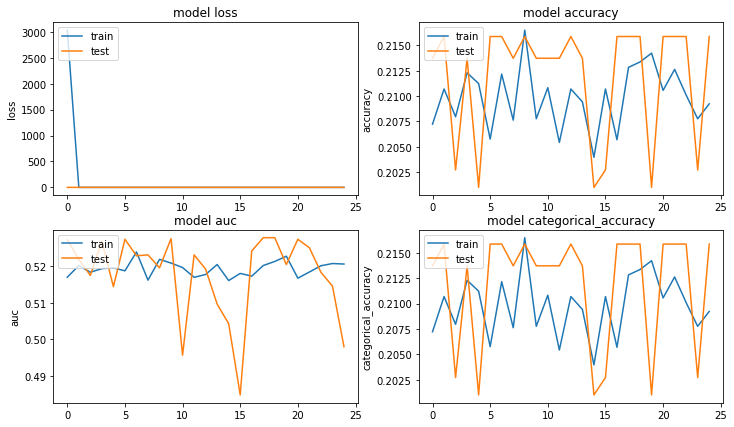

MODELO 1

 val_loss: 1.448029637336731

 val_accuracy: 44.19  %

 val_AUC: 75.34  %

 val_categorical_accuracy: 44.19  %


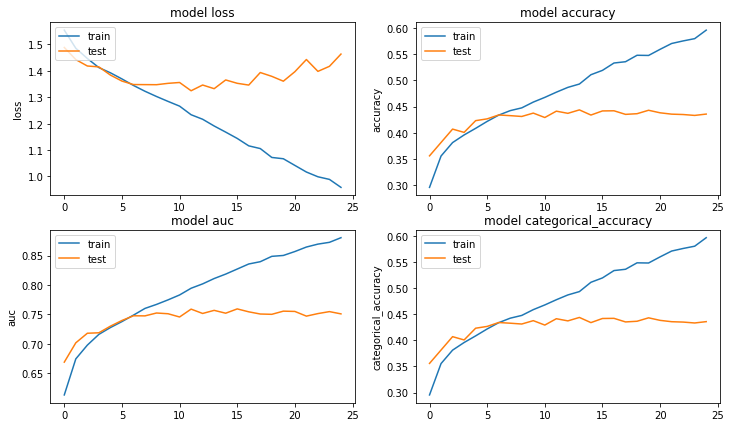

MODELO 2

 val_loss: 1.490519642829895

 val_accuracy: 36.49  %

 val_AUC: 66.9  %

 val_categorical_accuracy: 36.49  %


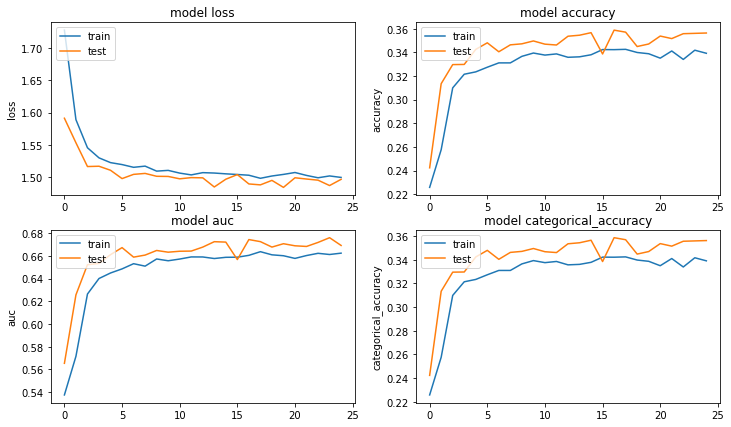

In [15]:

lista = [0,1,2]

for i in lista:
    print(f"MODELO {i}")
    # Print test accuracy
    print('\n', 'val_loss:', scores_age[i][0])
    print('\n', 'val_accuracy:', round(scores_age[i][1]*100,2)," %")
    print('\n', 'val_AUC:', round(scores_age[i][2]*100,2)," %")
    print('\n', 'val_categorical_accuracy:', round(scores_age[i][3]*100,2)," %")

    fig = plt.figure(figsize=(12,7))

    ax1 = fig.add_subplot(221)
    ax1.plot(history_age[i]['loss'])
    ax1.plot(history_age[i]['val_loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.legend(['train', 'test'], loc='upper left')


    ax2 = fig.add_subplot(222)
    ax2.plot(history_age[i]['accuracy'])
    ax2.plot(history_age[i]['val_accuracy'])
    ax2.set_title('model accuracy')
    ax2.set_ylabel('accuracy')
    ax2.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(223)
    ax3.plot(history_age[i]['auc'])
    ax3.plot(history_age[i]['val_auc'])
    ax3.set_title('model auc')
    ax3.set_ylabel('auc')
    ax3.legend(['train', 'test'], loc='upper left')

    ax3 = fig.add_subplot(224)
    ax3.plot(history_age[i]['categorical_accuracy'])
    ax3.plot(history_age[i]['val_categorical_accuracy'])
    ax3.set_title('model categorical_accuracy')
    ax3.set_ylabel('categorical_accuracy')
    ax3.legend(['train', 'test'], loc='upper left')


    plt.show()